In [1]:
from fastai.text.all import *
from pathlib import Path

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
torch.__version__

'1.13.1+cu117'

In [3]:
torch.cuda.is_available()

True

In [4]:
path_top21 =  Path('../data/train21_shuffled.csv')
df = pd.read_csv(path_top21)

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
44370,3,5,41,I don't know. It felt far.,Pam,False
44371,3,10,43,"Excuse me [tries to take away meat with chopsticks] Ah, un guard. [Fights with chopsticks and laughs] Family style.",Michael,False
44372,5,23,19,I never went to Thailand.,Ryan,False
44373,3,4,1,"[breathless] All right. Okay. [goes back down pretend stairs, crawls on belly to the kitchen for the coffee]",Michael,False


In [5]:
df_reduced = df.iloc[:1500]

,season,episode,scene,line_text,speaker,deleted
0,7,24,8,[conducting interview] Your paper experience is very interesting. Do you think you could use that experience to inform decisions here?,Jim,False
1,9,10,27,I'm not gonna lie. Lye!,Dwight,False
2,9,9,27,Take a bowl and pass it down.,Dwight,False
3,3,15,25,It's a miracle.,Dwight,False
4,7,1,1,This is how you build a business. This is how you make it in this country.,Ryan,False
...,...,...,...,...,...,...
1495,5,16,4,"Oh, look at that. Cupids and hearts. Really shoving our faces in it this year. You doin OK, bud?",Michael,False
1496,7,16,6,It's got you.,Holly,False
1497,6,19,40,It stopped.,Jim,False
1498,5,25,24,Cafe Disco? More like Crappe Disco.,Kelly,False


<Axes: >

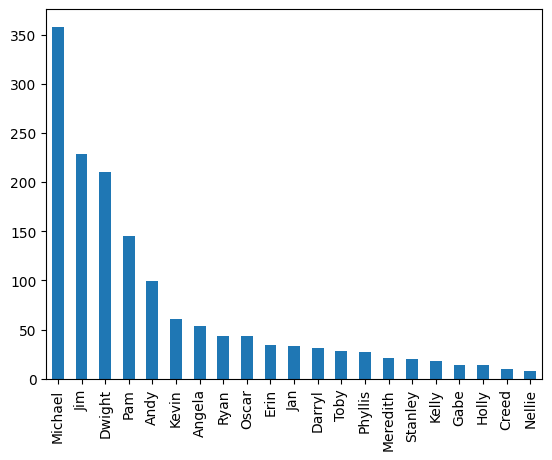

In [7]:
df_reduced['speaker'].value_counts().plot(kind='bar')

In [8]:
dls = TextDataLoaders.from_df(df, text_col='line_text', label_col='speaker')
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj nanoo , nanoo . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj vietnam ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos xxmaj ah , look at me . xxmaj i 'm huge in wilkes - barre . xxmaj performing xxunk , xxmaj michael xxmaj scott . xxmaj not comedy fans here , which is fine because not having a sense of humor is just as fine as having one . xxmaj questions ? xxmaj comment ? xxmaj ca n't see you , but i know that you 're not breathing . i know you 're breathing . xxmaj is this on ? xxmaj hello ? ' well , is n't that … xxmaj well , is n't that special ? ' ' jell - o pudding . ' xxmaj bill xxmaj cosby . i think xxmaj bill xxmaj cosby said it best when he talked about his brother and all of the fun he … xxmaj all the great things they did together as kids . xxmaj and there was",Michael
2,"xxbos xxmaj doctor xxmaj david xxmaj friendly 's xxmaj egg xxmaj yolk xxmaj diet . xxmaj it 's , it 's kind of unique . xxmaj it 's just , my diet the last couple months has xxunk mostly of eggs yolks and xxunk cheese . xxmaj and , um , what you do , you do n't just have the egg yolks , it 's not like a xxmaj rocky thing . xxmaj you do like hard boiled eggs and i got one a those melon xxunk [ shot of xxmaj michael xxunk boiled egg ] and xxup i , it 's just like a little ice cream scoop , and i just scoop out the middle of the egg and just pop it in my mouth . i do n't even , i do n't even use a plate anymore . xxmaj uh , the first couple weeks",Michael
3,"xxbos xxmaj okay , xxmaj okay , we do n't have much time . xxmaj just act normal . xxmaj do n't look at me people . xxmaj stop . xxmaj do n't look down . xxmaj do n't look down . xxmaj he 's going to see me . xxmaj do n't look all the way up . xxmaj keep it at a normal height . xxmaj okay . xxmaj this is not xxmaj michael xxmaj scott talking right now , this is your future . xxmaj hello , i am your future . xxmaj you 're older , and you are very happy now . xxmaj because you went with xxmaj michael xxmaj scott . xxmaj right . xxmaj so everybody come on down . xxmaj lets just crawl out of here together . xxmaj alright ? xxmaj come on ! xxmaj are you , are you doing",Michael
4,"xxbos i would love to live in xxmaj new xxmaj york someday . xxmaj it 's a big dream of mine . xxmaj work for corporate , with xxmaj jan . xxmaj it 'd be awesome . xxmaj go to xxmaj xxunk shows , eat hot dogs . xxmaj scranton is great , but xxmaj new xxmaj york , is like xxmaj scranton on acid , no on speed , no on steroids . [ michael sees it 's the end of a street . ] xxup ok , umm , i think , that 's either the xxmaj hudson or the xxmaj east , so we 're back , should be back this way . xxmaj there 's a lotta pressure on me right now . xxmaj it 's like xxmaj michael xxmaj jordan , in the xxup nba finals . xxmaj or , like xxmaj xxunk ' xxmaj",Michael
5,"xxbos xxmaj aw , thanks , xxmaj pete . xxmaj that was really nice . i just want to say how happy we are that all of you are here tonight . xxmaj and i want to especially thank those of you who xxunk from far away to be here with us tonight … especially the xxmaj xxunk cousins who , obviously , ca n't take a hint . [ laughter ] xxmaj four years ago , i was just a guy who had a crush on a girl who had a boyfriend . xxmaj and i had to do the hardest thing that xxmaj i 've ever had to do … which was just to wait . xxmaj uh , do n't get me wrong . i xxunk with her . xxmaj pam , i can now admit in front of 

In [9]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.75, metrics=accuracy)
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.534111,2.535368,0.235493,00:10


epoch,train_loss,valid_loss,accuracy,time
0,2.487513,2.487930,0.243944,00:18
1,2.484714,2.474931,0.248338,00:18
2,2.455076,2.454671,0.254648,00:18
3,2.385060,2.405872,0.267606,00:18
4,2.360468,2.392009,0.273239,00:18
5,2.332808,2.384077,0.278986,00:18
6,2.234860,2.390837,0.282817,00:18
7,2.175486,2.398660,0.281690,00:18
8,2.198930,2.416993,0.279887,00:18
9,2.116644,2.410620,0.280338,00:18


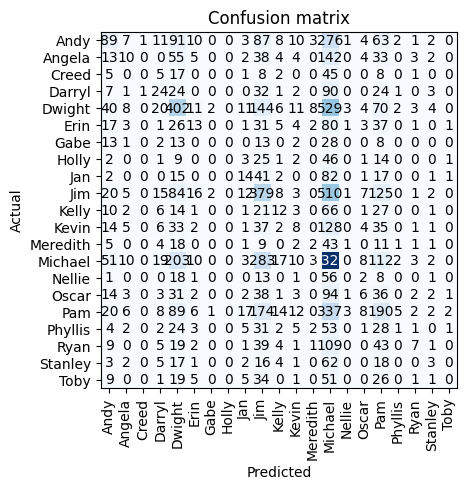

In [11]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [12]:
learner.fine_tune(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.174925,2.424387,0.279662,00:11


epoch,train_loss,valid_loss,accuracy,time
0,2.167832,2.426389,0.276845,00:18
1,2.181686,2.422281,0.272113,00:18
2,2.160146,2.447484,0.268056,00:18
3,2.169283,2.454702,0.275606,00:18
4,2.044063,2.497252,0.265239,00:18
5,1.935297,2.542181,0.266704,00:18
6,1.820455,2.596901,0.271549,00:18
7,1.768882,2.636551,0.272451,00:18
8,1.701138,2.683267,0.264563,00:18
9,1.649362,2.682736,0.264563,00:18


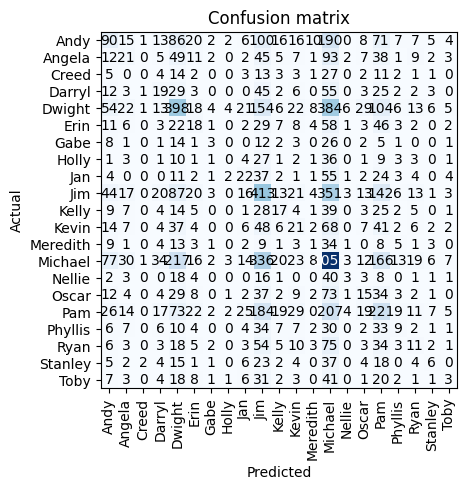

In [13]:
interp.plot_confusion_matrix()

In [15]:
dls.show_batch()

,text,category
0,"xxbos xxmaj i 've really learned from the xxunk . xxmaj the great xxunk , xxmaj drew xxmaj xxunk , xxmaj ryan xxmaj xxunk , uh , the xxmaj xxunk guy not so much . xxmaj he 's more the signing , xxmaj wayne xxmaj xxunk . xxmaj um , xxmaj robin xxmaj williams . xxmaj oh , man , would i love to go head - to - head with him . xxmaj oh ! xxmaj that would be exciting . [ as xxmaj robin xxmaj williams ] ' hi . xxmaj i 'm xxmaj xxunk from xxmaj xxunk . ' xxmaj well , xxmaj i 'm xxmaj xxunk from xxmaj xxunk . xxmaj nanoo , nanoo . xxmaj xxunk , xxunk . [ as xxmaj robin xxmaj williams ] ' that 's xxmaj good morning , xxmaj vietnam ! ' xxmaj well , hello to you . xxmaj",Michael
1,"xxbos [ answering phone ] xxmaj this is xxmaj angela . xxmaj oh . xxmaj hello , xxmaj miss xxmaj xxunk . xxmaj uh , how can i help you ? xxmaj did my rent check not clear ? xxmaj because i just transferred another $ 25 to that account . xxmaj so if there 's a problem it 's clearly on your end . xxmaj xxunk . xxmaj oh . xxmaj oh , okay . xxmaj good . xxmaj then … um ' what is this about ? xxmaj no , no . xxmaj hey , hey ! xxmaj no , you are out of line xxmaj miss xxmaj xxunk . xxmaj no , no you are . xxmaj no you are ! xxmaj xxunk ? xxmaj fine ! i did n't want to live in that xxunk anyway ! xxmaj listen , i get my security deposit back",Angela
2,"xxbos xxmaj jim it 's okay . xxmaj you can t … [ jim looks at xxmaj pam and shakes his head , xxmaj pam looks at him and gestures for xxmaj jim to go up and tell his story ] xxmaj this would be a good place to let it out , xxmaj jim . xxmaj these are people you can trust . xxmaj these are people who care about you . [ jim shakes his head no ] xxmaj it 's okay , just we will not judge you . xxmaj we are here to not judge you . [ jim stands up ] xxmaj oh , he 's doing it , okay . [ jim looks at xxmaj pam ] xxmaj it 's okay . [ jim pretends to try , looking xxunk eyed , shakes his head no , mouths ' i ca n't ' and",Michael
3,"xxbos xxmaj oh ! xxmaj seven new comments . ' the guy at 0:19 is hawt ! ' [ typing ] ' hi xxmaj xxunk , it 's me , xxmaj andy . xxmaj the guy from 0:19 , xxmaj i 'm glad that you enjoyed my work in that promo . i really enjoyed your comment , going to read some more comments now . xxmaj have a great xxunk ] ' he 's not hawt , he 's gay . ' [ typing ] ' dear xxunk , it 's me , xxmaj andy . xxmaj nice name . xxmaj not ! xxmaj guess what ? xxmaj i 'm not gay ! xxmaj so you are an xxup idiot . xxmaj and i am hawt , according to people on this site who have a brain . xxmaj never comment on this page ever again . ' [",Andy
4,"xxbos xxmaj when xxmaj michael told us that xxmaj jan was pregnant , he led us all to believe that he was the father … by telling us he was the father . xxmaj but then we got this e - mail from xxmaj jan . [ waves paper and reads from it ] ' hi , everyone ! xxmaj jan here , writing to share some wonderful news and to xxunk a rumor . xxmaj first , the great news - i am expecting . xxmaj the beautiful baby inside me will be ready to meet the world this fall just a few months before the launch of the new xxmaj serenity by xxmaj jan line ( xxunk plug , i know , do n't hate me , xxup xxunk ) . xxmaj anyway , i also wanted to clarify that the father is not anyone that you or",Jim
5,"xxbos xxmaj okay , this is the moment that you have all been waiting for . xxmaj our first item up for xxunk tonight is something that i consider to be very boss indeed . [ cheers and applause ] xxmaj it is a xxmaj yoga lesson from xxmaj holly xxmaj flax ! xxmaj yoga ! xxmaj and i would like to start the bidding off at 300 dollars . [ xxunk voice ] 300 dollars do i hear 300 dollars ? 300 dollars . xxmaj hey , xxwrep 3 batter , hey batter , swing batter , 300 dollars , 300 dollars , 300 dollars . xxmaj anybody , 300 dollars . 400 dollars . xxmaj who wants for xxunk gibberish ] xxmaj do i see somebody in the back ? xxmaj is there somebody in the back ? xxmaj do i see somebody in the back ? 400",Mi

In [32]:
learner.predict('hey batter , swing batter, 300 dollars , 300 dollars')

('Michael',
 tensor(13),
 tensor([1.3909e-02, 3.6994e-03, 1.0030e-02, 4.4046e-02, 5.9036e-03, 1.4601e-02,
         1.7805e-04, 1.4412e-03, 1.8480e-03, 1.5043e-02, 2.4668e-02, 2.0726e-01,
         9.7646e-03, 5.0196e-01, 9.3359e-04, 6.1578e-02, 1.9269e-03, 2.1893e-02,
         5.6447e-02, 2.7178e-04, 2.5987e-03]))

In [33]:
learner.save('20_epoch')

Path('models/20_epoch.pth')